In [4]:
import numpy as np
import pandas as pd
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
color=sns.color_palette()
sns.set_style('darkgrid')
import warnings
warnings.filterwarnings('ignore')

from scipy import stats
from scipy.stats import norm,skew
pd.set_option('display.float_format',lambda x:'{:.3f}'.format(x))

df1=pd.read_csv('homework1/youtube/CAvideos.csv')
df1.head(5)
cl=['comments_disabled','ratings_disabled','video_error_or_removed']
for col in cl:
    print(df1[col].value_counts())
    print('-'*50)

False    40298
True       583
Name: comments_disabled, dtype: int64
--------------------------------------------------
False    40602
True       279
Name: ratings_disabled, dtype: int64
--------------------------------------------------
False    40854
True        27
Name: video_error_or_removed, dtype: int64
--------------------------------------------------


数据可视化



 mu = 1147035.91 and sigma = 3390871.55



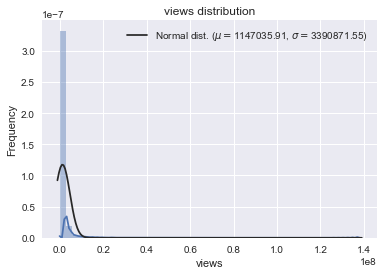

In [5]:
views = df1['views'].apply(lambda x: x + np.random.normal())
sns.distplot(views, fit=norm);
mu, sigma = norm.fit(views)
print( '\n\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

plt.legend(['Normal dist. ($\mu=${:.2f}, $\sigma=${:.2f})'.format(mu, sigma)], loc='best')
plt.ylabel('Frequency')
plt.title('views distribution')

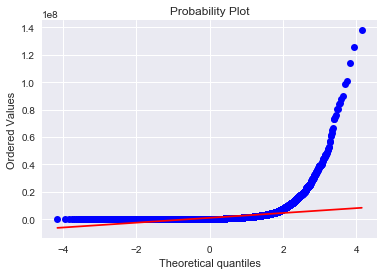

In [6]:
#QQ图
fig = plt.figure()
res = stats.probplot(views, plot=plt)
plt.show()



 mu=39582.68 and sigma=132687.91



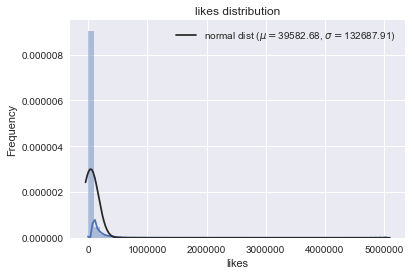

In [10]:
likes=df1['likes'].apply(lambda x: x+np.random.normal())
sns.distplot(likes,fit=norm)
mu,sigma=norm.fit(likes)
print('\n\n mu={:.2f} and sigma={:.2f}\n'.format(mu,sigma))
plt.legend(['normal dist ($\mu=${:.2f}, $\sigma=${:.2f})'.format(mu,sigma)],loc='best')
plt.ylabel('Frequency')
plt.title('likes distribution')

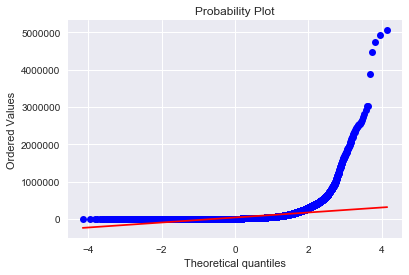

In [12]:
#qq图
fig = plt.figure()
res = stats.probplot(likes, plot=plt)
plt.show()



 mu = 2009.20 and sigma = 19008.14



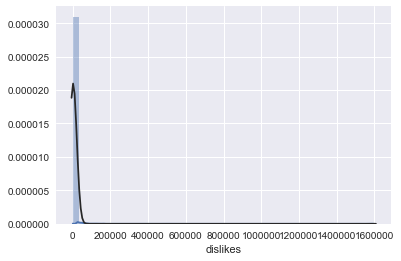

In [15]:
dislikes=df1['dislikes'].apply(lambda x: x + np.random.normal())
sns.distplot(dislikes, fit=norm);
mu, sigma = norm.fit(dislikes)
print( '\n\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

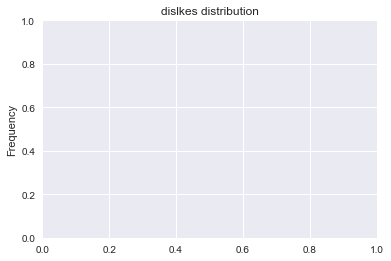

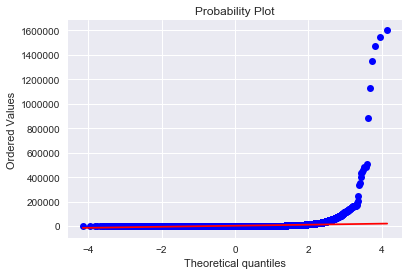

In [16]:
plt.legend(['Normal dist. ($\mu=${:.2f}, $\sigma=${:.2f})'.format(mu, sigma)], loc='best')
plt.ylabel('Frequency')
plt.title('dislkes distribution')

#qq图
fig = plt.figure()
res = stats.probplot(dislikes, plot=plt)
plt.show()


 mu = 5042.97 and sigma = 21578.76



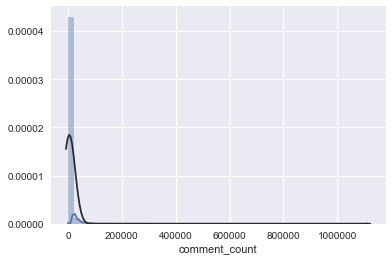

In [17]:
comment_count = df1['comment_count'].apply(lambda x: x + np.random.normal())
sns.distplot(comment_count, fit=norm);
mu, sigma = norm.fit(comment_count)
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

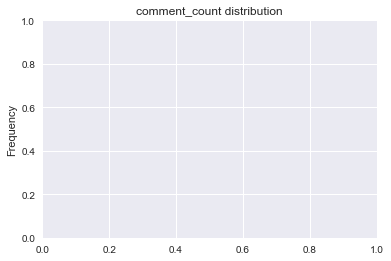

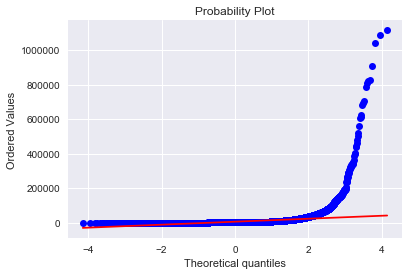

In [19]:
plt.legend(['Normal dist. ($\mu=${:.2f}, $\sigma=${:.2f})'.format(mu, sigma)], loc='best')
plt.ylabel('Frequency')
plt.title('comment_count distribution')

#qq图

fig = plt.figure()
res = stats.probplot(comment_count, plot=plt)
plt.show()

通过分析柱状图和QQ图，likes，dislikes，comment_count都不服从正态分布

绘制盒图

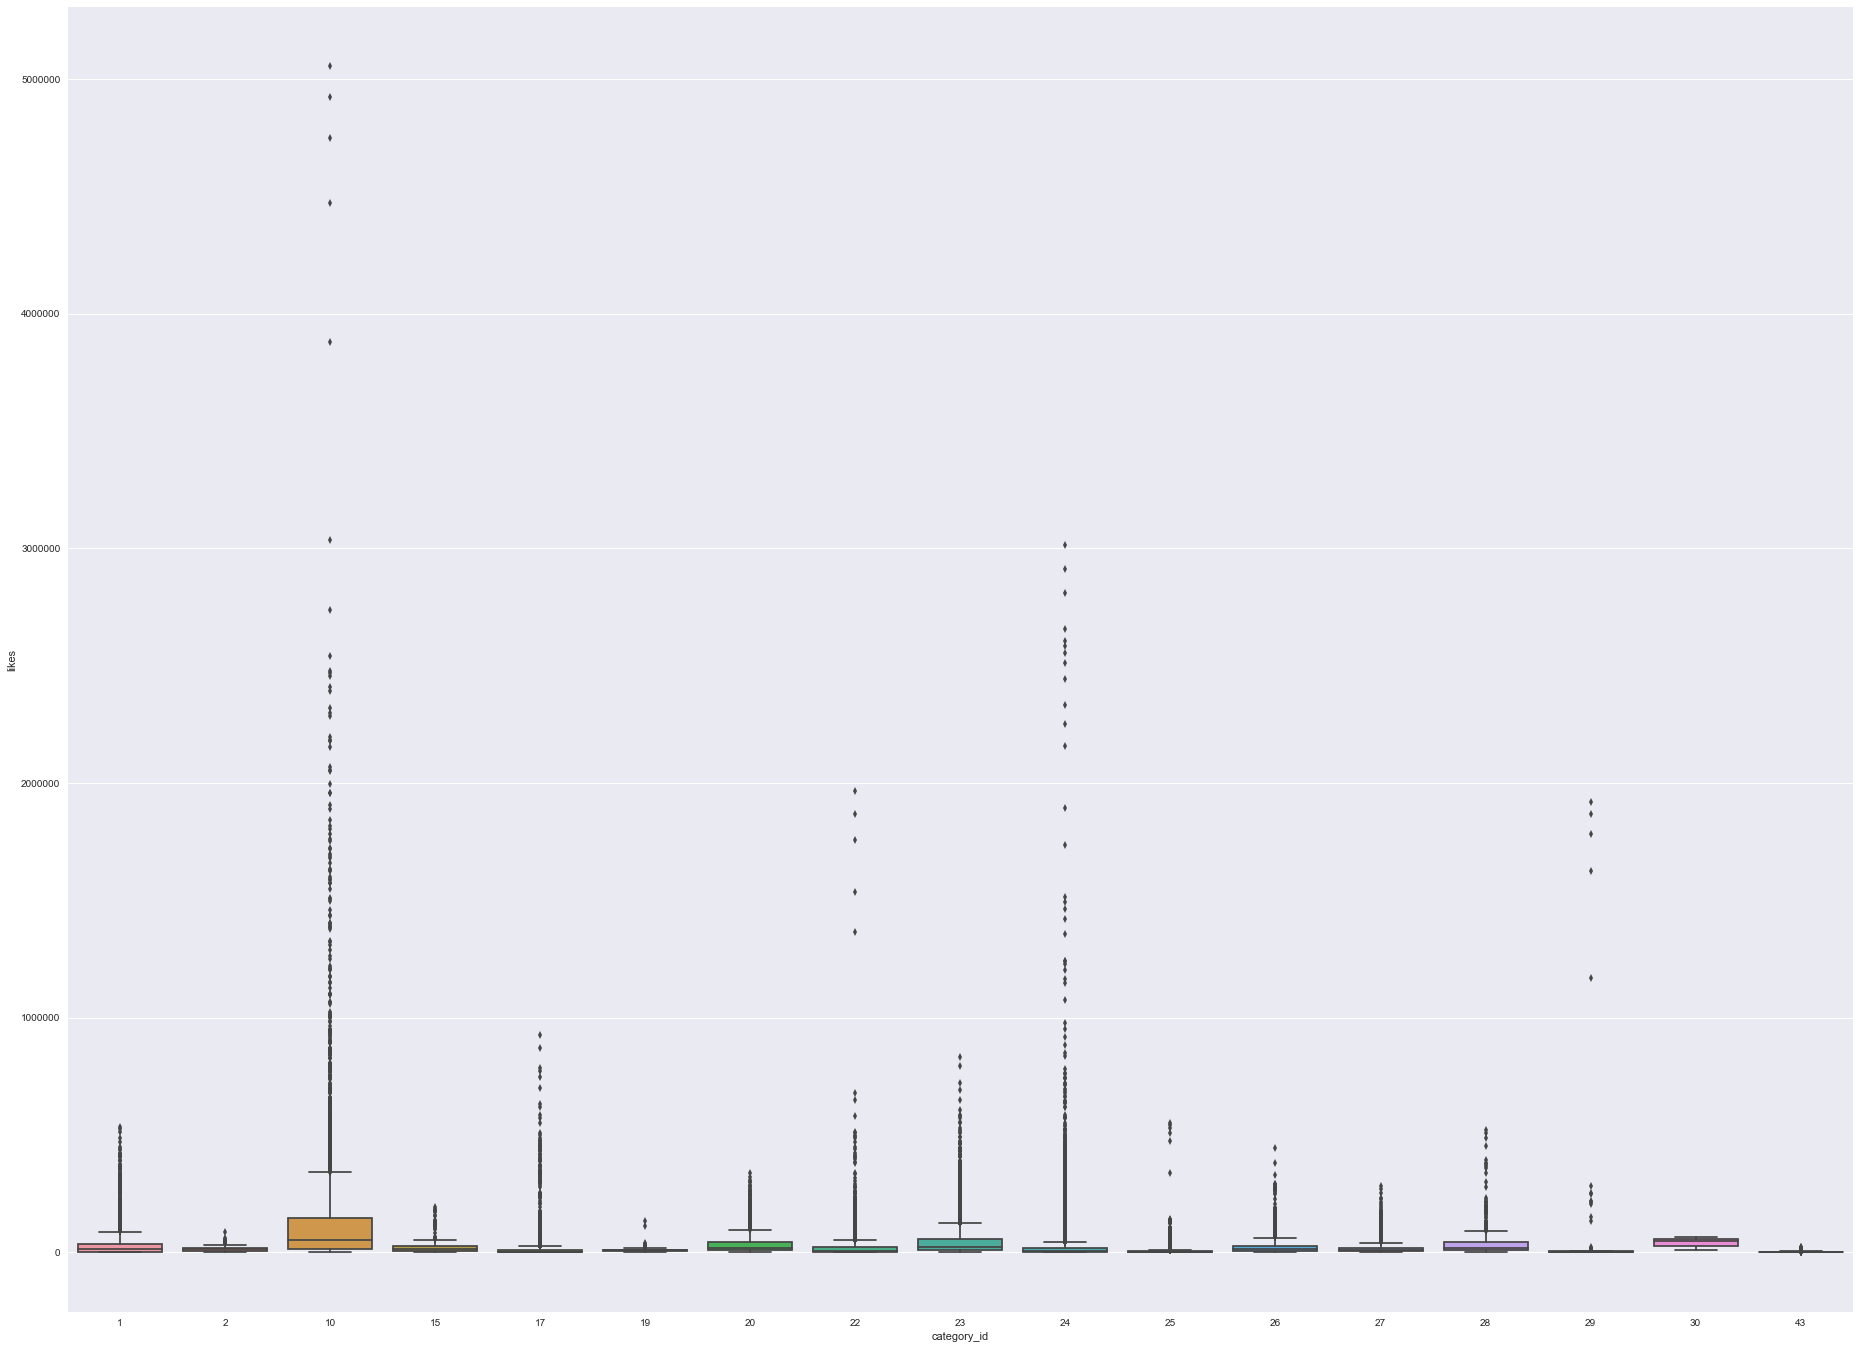

In [20]:
var = 'category_id'
data = pd.concat([df1['likes'], df1[var]], axis=1)
f,ax = plt.subplots(figsize=(32, 24))
fig = sns.boxplot(x=var, y="likes", data=data)

缺失值分析

In [21]:
df1.isnull().sum()

video_id                     0
trending_date                0
title                        0
channel_title                0
category_id                  0
publish_time                 0
tags                         0
views                        0
likes                        0
dislikes                     0
comment_count                0
thumbnail_link               0
comments_disabled            0
ratings_disabled             0
video_error_or_removed       0
description               1296
dtype: int64

In [22]:
all_data_na = (df1.isnull().sum() / len(df1)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio':all_data_na})
missing_data

,Missing Ratio
description,3.170


In [23]:
df1['description'] = df1['description'].fillna('None')
df1.isnull().sum()

video_id                  0
trending_date             0
title                     0
channel_title             0
category_id               0
publish_time              0
tags                      0
views                     0
likes                     0
dislikes                  0
comment_count             0
thumbnail_link            0
comments_disabled         0
ratings_disabled          0
video_error_or_removed    0
description               0
dtype: int64

description是视频的描述性文本，经过分析认为应该是缺失代表作者没有添加描述性文本，将其填充为None

In [24]:
all_data_na = (df1.isnull().sum() / len(df1)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio':all_data_na})
missing_data

,Missing Ratio
